In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ht = pd.read_csv('Heart.csv')
ht.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [3]:
ht.shape

(303, 15)

In [4]:
ht = ht.drop(['Unnamed: 0'],axis=1)

In [5]:
ht.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [181]:
ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age          303 non-null int64
Sex          303 non-null int64
ChestPain    303 non-null object
RestBP       303 non-null int64
Chol         303 non-null int64
Fbs          303 non-null int64
RestECG      303 non-null int64
MaxHR        303 non-null int64
ExAng        303 non-null int64
Oldpeak      303 non-null float64
Slope        303 non-null int64
Ca           299 non-null float64
Thal         301 non-null object
AHD          303 non-null object
dtypes: float64(2), int64(9), object(3)
memory usage: 33.2+ KB


In [182]:
ht.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [183]:
ht['Thal'].value_counts()

normal        166
reversable    117
fixed          18
Name: Thal, dtype: int64

In [184]:
ht['Ca'].fillna(value=np.median(ht['Ca'].dropna()),inplace=True)
ht['Thal'].fillna('S',inplace=True)

In [185]:
ht.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [7]:
ht.corr()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
Age,1.000000,-0.097542,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.362605
Sex,-0.097542,1.000000,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185
RestBP,0.284946,-0.064456,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773
Chol,0.208950,-0.199915,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000
Fbs,0.118530,0.047862,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478
RestECG,0.148868,0.021647,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343
MaxHR,-0.393806,-0.048663,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246
ExAng,0.091661,0.146201,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570
Oldpeak,0.203805,0.102173,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832
Slope,0.161770,0.037533,0.117382,-0.004062,0.059894,0.133946,-0.385601,0.257748,0.577537,1.000000,0.110119


In [186]:
ht_new1 = pd.get_dummies(ht,drop_first=True)
ht_new1.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_Yes
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,1,1,0,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,0,0,0,0,1,0,1
2,67,1,120,229,0,2,129,1,2.6,2,2.0,0,0,0,0,0,1,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,1,0,0,0,1,0,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,1,0,0,1,0,0


In [187]:
#Target variable is AHD here. Since it is a categorical variable, logistic regression can be used.

In [188]:
from sklearn.model_selection import train_test_split

In [217]:
x=ht_new1.drop(['AHD_Yes','Age','Fbs','RestECG'],axis=1)
y=ht_new1['AHD_Yes']

In [218]:
x.head()

,Sex,RestBP,Chol,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,1,145,233,150,0,2.3,3,0.0,0,0,1,1,0,0
1,1,160,286,108,1,1.5,2,3.0,0,0,0,0,1,0
2,1,120,229,129,1,2.6,2,2.0,0,0,0,0,0,1
3,1,130,250,187,0,3.5,3,0.0,1,0,0,0,1,0
4,0,130,204,172,0,1.4,1,0.0,0,1,0,0,1,0


In [219]:
y.shape


(303,)

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
from sklearn.linear_model import LogisticRegression

In [222]:
log_reg = LogisticRegression()

In [223]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [224]:
log_reg.fit(x_train,y_train)
pred_train = log_reg.predict(x_train)
print(pd.crosstab(y_train,pred_train))


col_0      0   1
AHD_Yes         
0        105  10
1         21  76


In [247]:
accuracy = (105+76)/x_train.shape[0]
print(accuracy*100)

85.37735849056604


In [248]:
sensitivity = 1/(21+76)
print(sensitivity*100)

1.0309278350515463


In [259]:
precision = 1/(76+10)
print(precision*100)

1.1627906976744187


In [250]:
#predict on test data
pred_test=log_reg.predict(x_test)
print(pd.crosstab(y_test,pred_test))

col_0     0   1
AHD_Yes        
0        44   5
1         6  36


In [251]:
accuracy = (44+36)/x_test.shape[0]
print(accuracy*100)

87.91208791208791


In [252]:
sensitivity = 1/(6+36)
print(sensitivity*100)

2.380952380952381


In [260]:
precision = 1/(5+36)
print(precision*100)

2.4390243902439024


In [254]:
pred_train_prob= log_reg.predict_proba(x_train)

In [261]:
pred_train_prob_only1=pred_train_prob[:,1]

In [262]:
final_yhat=[]
for i in pred_train_prob_only1:
    if i>0.4:
        final_yhat.append(1)
    else:
        final_yhat.append(0)

In [263]:
pd.crosstab(y_train,np.array(final_yhat))

col_0,0,1
AHD_Yes,,
0,96,19
1,16,81


In [264]:
import statsmodels.discrete.discrete_model as sm
from statsmodels.api import add_constant

In [237]:
x2 = add_constant(x_train)

In [265]:
logit = sm.Logit(y_train,x2)

In [266]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\Users\aaa\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [267]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                AHD_Yes   No. Observations:                  212
Model:                          Logit   Df Residuals:                      197
Method:                           MLE   Df Model:                           14
Date:                Fri, 11 Jan 2019   Pseudo R-squ.:                     inf
Time:                        21:49:45   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.1044      3.246     -0.340      0.734      -7.466       5.257
Sex                      1.7590      0.581      3.030      0.002       0.621       2.897
RestBP      

C:\Users\aaa\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\aaa\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\aaa\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [268]:
from sklearn import metrics

In [269]:
pred_test_prob= log_reg.predict_proba(x_test)

C:\Users\aaa\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


AttributeError: module 'matplotlib.pyplot' has no attribute 'xlin'

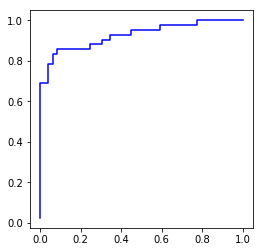

In [270]:
fpr,tpr,threshold = metrics.roc_curve(y_test,pred_test_prob[:,1])
# predicted probability (onlyp(y)=1)
plt.plot(fpr,tpr,label='ROC Curve',color = 'b')
plt.axes().set_aspect('equal')
plt.xlin([-0.05,1.05])
plt.ylin([-0.05,1.05])

In [271]:
AUC = metrics.auc(fpr,tpr)# to get the area under curve
print (AUC)

0.9266277939747327
